<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/UTS_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Final Pipeline Klasifikasi Machine Learning
Dataset di-upload langsung dari Library Google Colab.

Langkah-langkah:
1. Upload Dataset
2. Jalankan Pipeline Klasifikasi
3. Evaluasi & Visualisasi

In [1]:
# Upload Dataset dari lokal
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['KlasifikasiUTS.csv']))
df.drop_duplicates(inplace=True)
df.head()

Saving KlasifikasiUTS.csv to KlasifikasiUTS.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Import Library Tambahan
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Feature Selection & Engineering
X = df.drop('Class', axis=1)
y = df['Class']
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# Modeling
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest (Bagging)': RandomForestClassifier(),
    'AdaBoost (Boosting)': AdaBoostClassifier(),
    'SVM': SVC(probability=True)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.999095,0.842105,0.563380,0.675105,0.963738
1,Decision Tree,0.999154,0.757353,0.725352,0.741007,0.862482
2,KNN,0.999436,0.943396,0.704225,0.806452,0.904796
3,Random Forest (Bagging),0.999565,0.964602,0.767606,0.854902,0.923975
4,AdaBoost (Boosting),0.999037,0.738095,0.654930,0.694030,0.964044
5,SVM,0.999248,0.975610,0.563380,0.714286,0.909921


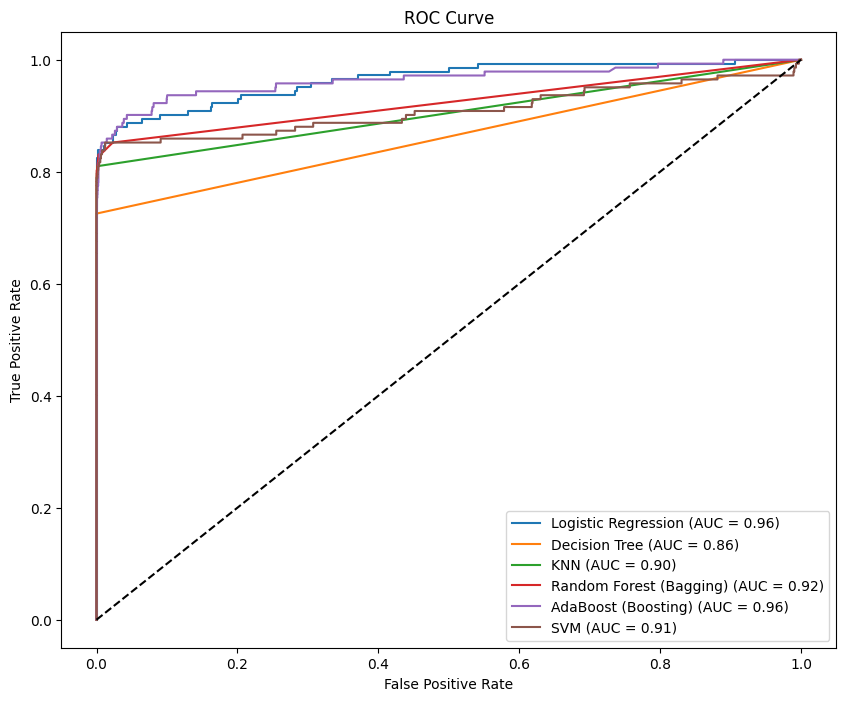

In [5]:
# ROC Curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### ✅ Analisis Model Terbaik
- Pilih model dengan **F1-Score** dan **AUC** tertinggi.
- Biasanya model ensemble (**Random Forest**, **AdaBoost**) memberikan performa terbaik.
- Cocok digunakan untuk deployment karena stabil dan akurat.